# MineCraft Data Analysis - DSCI-100-008 (Group 6)

## 1. Introduction

The data used in this analysis is from a computer science research group led by Frank Wood at UBC. Their goal was to better understand how people play games in order to train AI to converse with players. This was done by setting up a MineCraft server where players who decide to sign up would have their gameplay data collected. 

To get a better understanding of how people played the game, one of the questions they asked was:

**"We would like to know which 'kinds' of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts."**

To answer this, the research question we decided to investigate was:

**To what extent do age (in years) and total hours played predict whether a player is classified as an experienced player?**

This will address the broad question by seeing if there is a possible relationship between a players age and/or total gameplay duration and what their experience level is. Here, we will use both age and total gameplay duration to analyze the different kinds of players. Additionally, we will make the assumption that the experience level group (amateur, beginner, regular, pro, and veteran) with the highest number of players will contribute the most data. For example, if most of the players are classified as a beginner, they would be the targeted players.

## 2. Methods & Results

This section outlines the full visualization and analytical process used to investigate the research question: 

**To what extent do age (in years) and total hours played predict whether a player is classified as an experienced player?** 

To address this question, we first prepare and clean the data to ensure that age, total hours played, and a binary experience classification can be analyzed reliably. We then compute basic summary statistics to understand the overall characteristics of the dataset. Following this, a series of visualizations are generated - each designed to explore the distribution of the predictor variables, compare them across experience groups, and examine how age and hours played relate to one another. Together, these subsections provide the foundational descriptive analysis necessary to later evaluate how strongly age and hours played may predict whether a player is experienced.


<br>

**Loaded Required Packages and Data:**

The first step of the analysis was to load the necessary R packages, including tidyverse, janitor, dplyr, ggplot2, and readr, which collectively provide tools for data manipulation, cleaning, and visualization. The code then imports two datasets - players.csv and sessions.csv and cleans their column names using clean_names() for consistency. Previewing the first few rows of each dataset allows us to verify that the files loaded correctly and that key variables such as age, played_hours, and experience are present. This initial step establishes a reliable foundation for all subsequent analysis.

In [24]:
library(tidyverse)
library(tidymodels)
library(janitor)
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(scales)

players_url <- "https://raw.githubusercontent.com/gaida123/dsci-100-008-group-6/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/gaida123/dsci-100-008-group-6/refs/heads/main/sessions.csv"

players <- read_csv(players_url) |> clean_names()
sessions <- read_csv(sessions_url) |> clean_names()

players |> head()
sessions |> head()

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column s

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


<br>

**Data Wrangling and Cleaning for Planned Analysis:**

Before conducting statistical analysis, the data required several transformations to ensure it matched the needs of the research question. For this reasearch question we only need players.csv. The code first selects only the variables relevant to predicting player experience - experience, age, and played_hours. Missing values in played_hours are replaced with zeros so that non-playing participants are still represented. Next, a new binary variable is created: experienced_binary.

- “Experienced” includes Pro and Veteran players.

- “Inexperienced” includes Amateur, Regular, and Beginner players.

This transformation is essential, because the research question requires predicting experienced vs. inexperienced, not the original multi-category labels. All subsequent visualizations and analyses use this cleaned dataset.

In [9]:
data_players <- players |>
  select(experience, age, played_hours) |>
  mutate(experience = factor(experience),
  played_hours = replace_na(played_hours, 0),
  experienced_binary = case_when(experience %in% c("Pro", "Veteran") ~ "Experienced",
                                  experience %in% c("Amateur", "Regular", "Beginner") ~ "Inexperienced",
                                 TRUE ~ NA_character_),
  experienced_binary = factor(experienced_binary,
                                levels = c("Inexperienced", "Experienced")))

data_players

experience,age,played_hours,experienced_binary
<fct>,<dbl>,<dbl>,<fct>
Pro,9,30.3,Experienced
Veteran,17,3.8,Experienced
Veteran,17,0.0,Experienced
Amateur,21,0.7,Inexperienced
Regular,21,0.1,Inexperienced
Amateur,17,0.0,Inexperienced
Regular,19,0.0,Inexperienced
Amateur,21,0.0,Inexperienced
Amateur,47,0.1,Inexperienced


<br>

**Summary Statistics:**

Summary statistics are calculated for both age and total hours played, including the mean and standard deviation of each variable. This provides a quick understanding of the central tendency and variability within the dataset.These descriptive statistics help contextualize later plots and confirm that the two predictors (age and hours played) have enough variation to meaningfully model experience classification.

In [10]:
data_players_summary <- data_players |>
    summarize(mean_age = mean(age, na.rm = TRUE),
    sd_age = sd(age, na.rm = TRUE),
    mean_hours = mean(played_hours, na.rm = TRUE),
    sd_hours = sd(played_hours, na.rm = TRUE))
data_players_summary

mean_age,sd_age,mean_hours,sd_hours
<dbl>,<dbl>,<dbl>,<dbl>
21.13918,7.389687,5.845918,28.35734


<br>

**Visualization 1 - Distribution of Total Hours Played Across All Players:**

This code produces a histogram of the played_hours variable. The purpose of this visualization is to examine the overall distribution of hours played among all players - specifically whether the distribution is symmetric, skewed, or contains outliers. Understanding this distribution is crucial for the research question because total hours played is one of the two predictor variables. Any irregularities or skewness in this data informs how well hours played can differentiate between experienced and inexperienced players. 

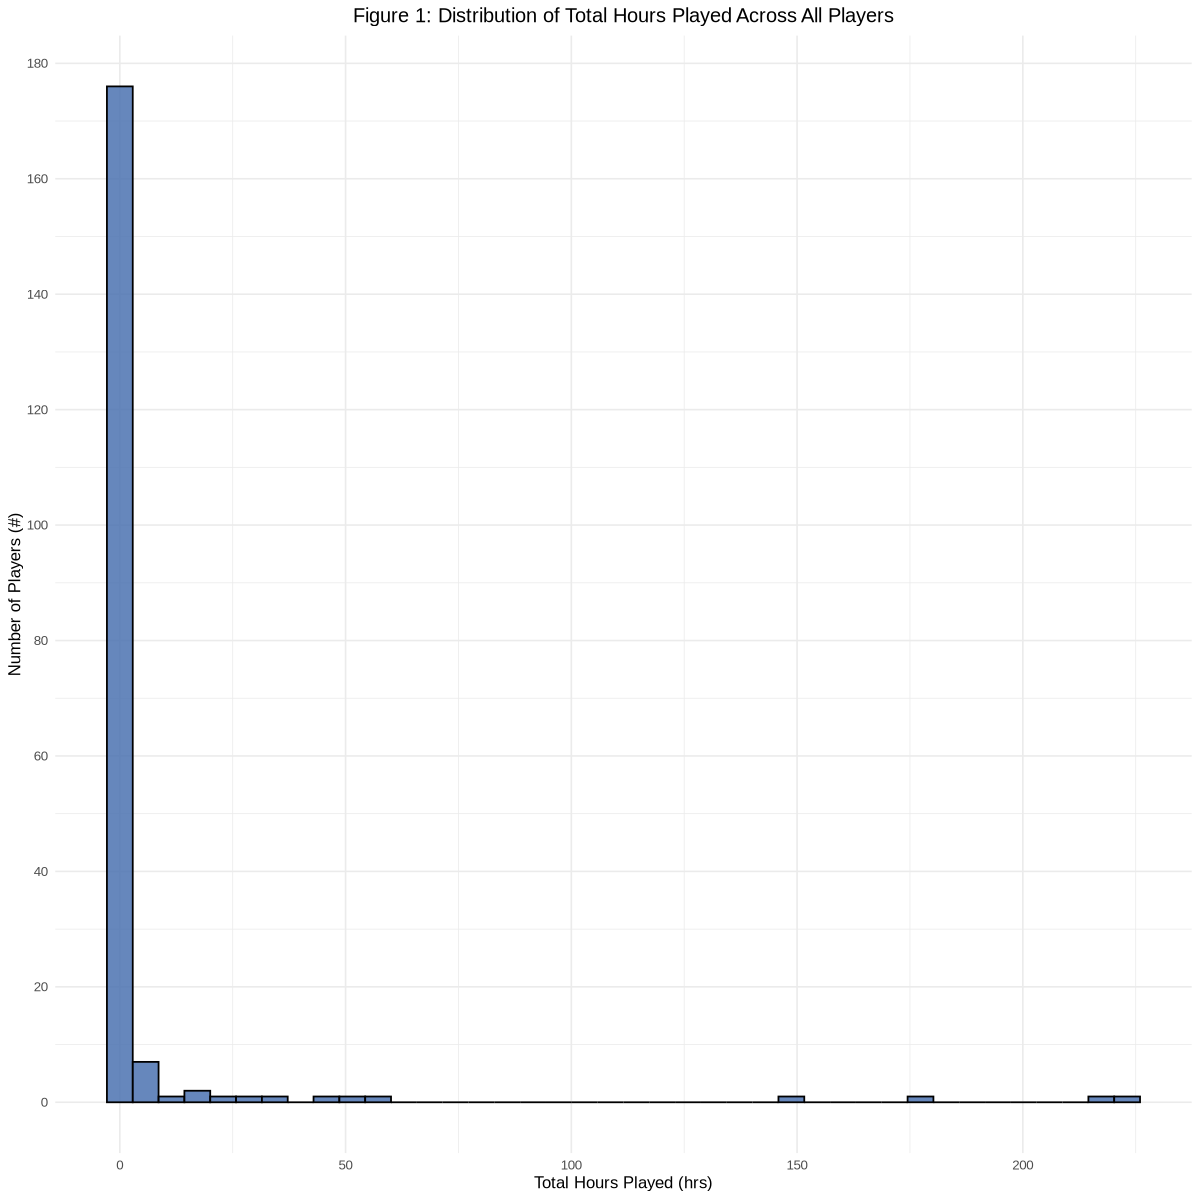

In [11]:
options(repr.plot.width = 10, repr.plot.height = 10)

vis1_hours_distribution <- data_players |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(bins = 40,
                 fill = "#4C72B0",
                 color = "black",
                 alpha = 0.85) +
  scale_y_continuous(n.breaks = 10) +
  labs(title = "Figure 1: Distribution of Total Hours Played Across All Players",
       x = "Total Hours Played (hrs)",
       y = "Number of Players (#)") +
  theme_minimal(base_size = 10) +
  theme(plot.title = element_text(hjust = 0.5))

vis1_hours_distribution

<br>

**Visualization 2 — Comparison of Age by Experience Level:**

This section generates a boxplot comparing the age of experienced and inexperienced players. The code organizes the data by the binary experience classification and plots the distribution of ages for each group. This visualization helps determine whether age differs meaningfully between experience groups, which directly supports assessing whether age is a meaningful predictor in the research question. If the boxplots show separation or differences in variability, this signals potential predictive value.

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


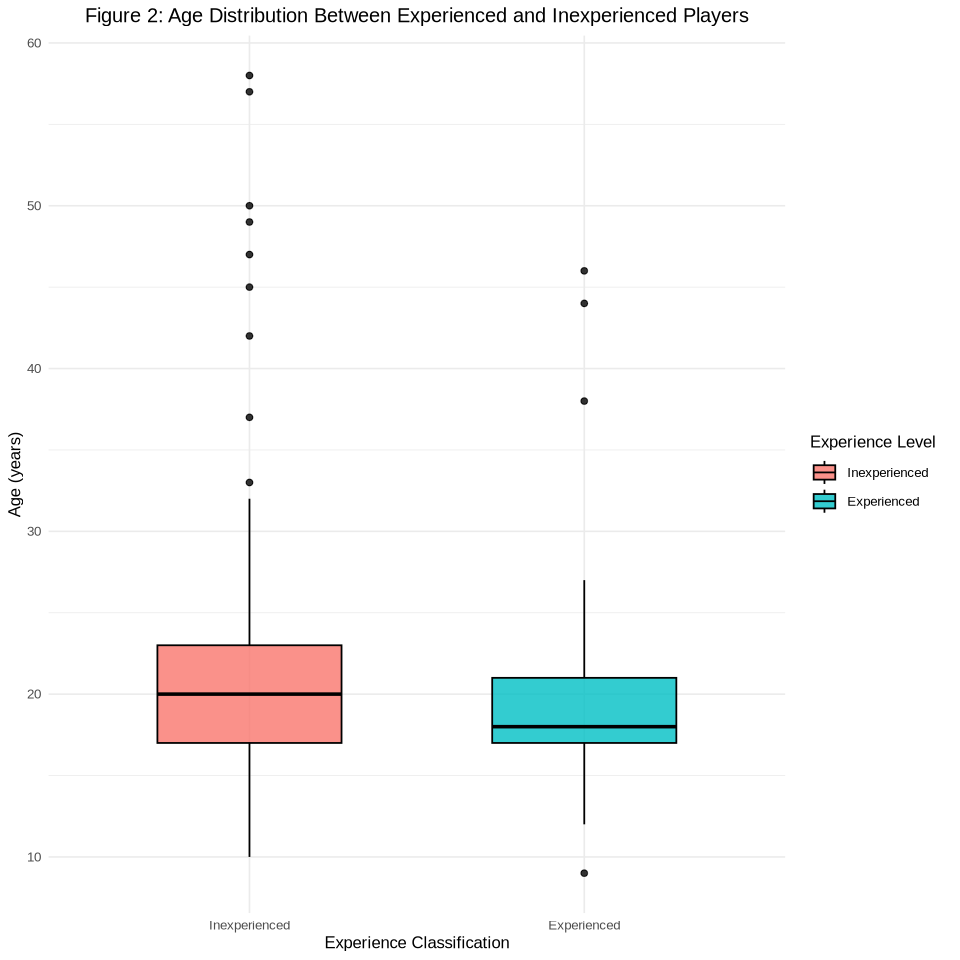

In [12]:
options(repr.plot.width = 8, repr.plot.height = 8)

vis2_age_experience <- data_players |>
  ggplot(aes(x = experienced_binary, y = age, fill = experienced_binary)) +
  geom_boxplot(alpha = 0.8, width = 0.55, color = "black") +
  labs(title = "Figure 2: Age Distribution Between Experienced and Inexperienced Players",
           x = "Experience Classification",
           y = "Age (years)",
        fill = "Experience Level") +
  theme(legend.position = "right") +  
  theme_minimal(base_size = 10) +
  theme(plot.title = element_text(hjust = 0.5))

vis2_age_experience

<br>

**Visualization 3 - Total Hours Played by Experience Level:**

The next boxplot compares total hours played across experienced and inexperienced players. Because total hours played is a key predictor in the research question, this visualization helps reveal whether experienced players tend to accumulate more hours than inexperienced players. By comparing medians, ranges, and the presence of outliers, this plot supports evaluating whether hours played is likely to predict the experience classification.

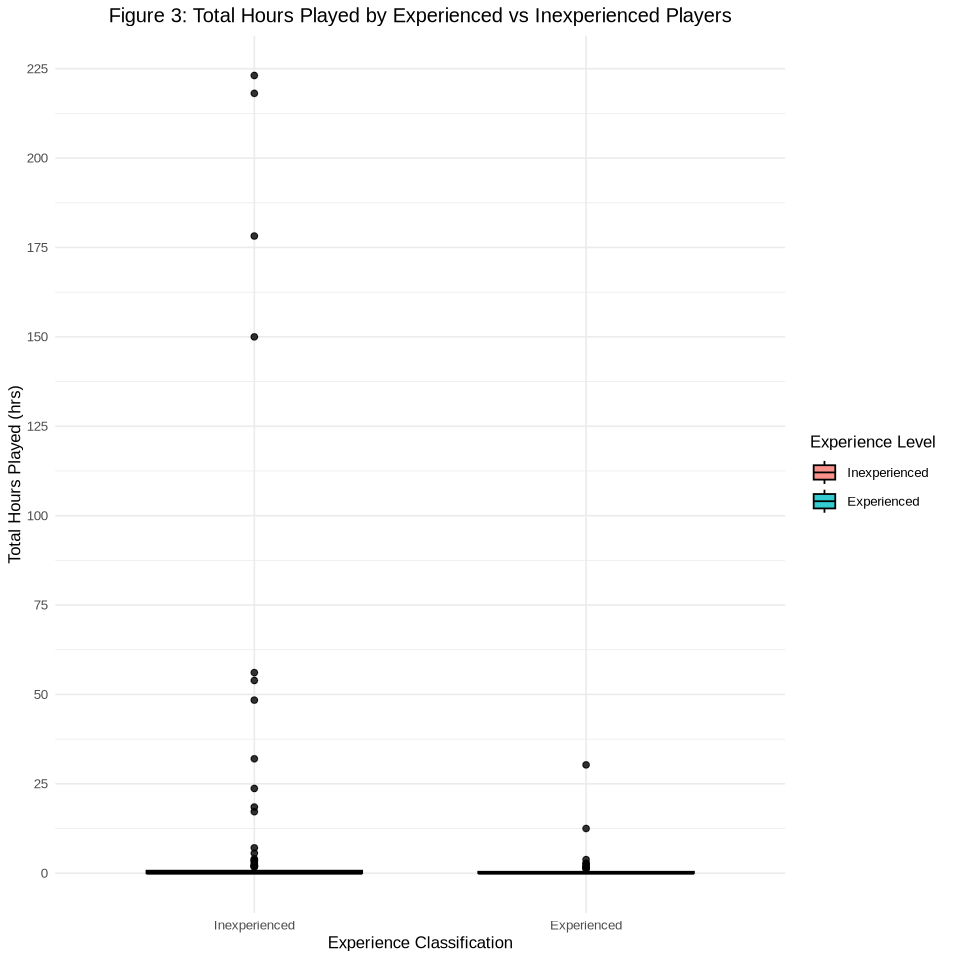

In [13]:
options(repr.plot.width = 8, repr.plot.height = 8)

vis3_hours_experience <- data_players |>
  ggplot(aes(x = experienced_binary, y = played_hours, fill = experienced_binary)) +
  geom_boxplot(alpha = 0.8, width = 0.65, color = "black") +
  scale_y_continuous(n.breaks = 10) +
  labs(title = "Figure 3: Total Hours Played by Experienced vs Inexperienced Players",
           x = "Experience Classification",
           y = "Total Hours Played (hrs)",
        fill = "Experience Level") +
  theme(legend.position = "right") +
  theme_minimal(base_size = 10) +
  theme(plot.title = element_text(hjust = 0.5))

vis3_hours_experience

<br>

**Visualization 4 - Age vs. Hours Played, Colored by Experience:**

The final visualization plots age on the x-axis and total hours played on the y-axis, with points colored according to the experience classification. This code enables exploration of possible interactions between age and hours played, and whether patterns emerge that distinguish experienced from inexperienced players. This scatterplot is especially helpful because it visualizes the two predictor variables together, allowing us to see whether combinations of age and hours played jointly relate to experience classification.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


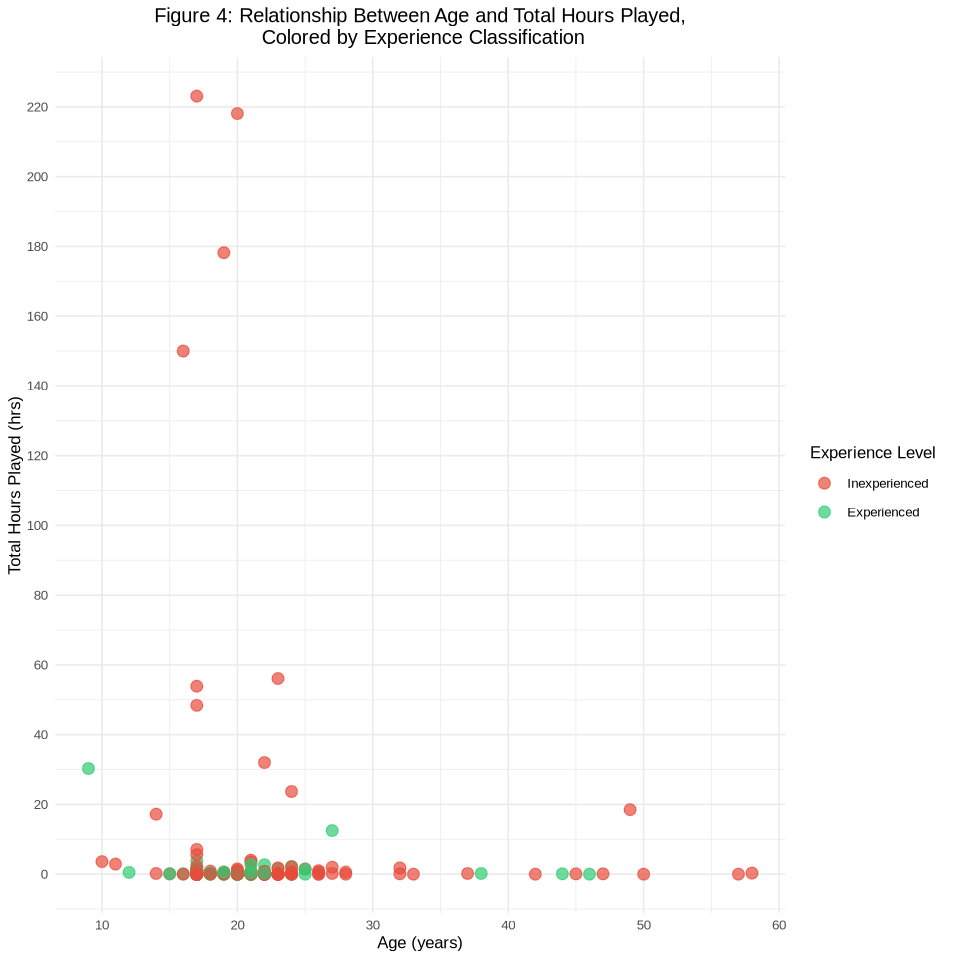

In [14]:
options(repr.plot.width = 8, repr.plot.height = 8)

vis4_age_hours_scatter <- data_players |>
  ggplot(aes(x = age, y = played_hours, color = experienced_binary)) +
  geom_point(size = 3, alpha = 0.7) +
  scale_color_manual(values = c("Inexperienced" = "#E74C3C",
                                "Experienced" = "#2ECC71")) +
  scale_y_continuous(n.breaks = 15) + 
  labs(title = "Figure 4: Relationship Between Age and Total Hours Played,\n Colored by Experience Classification",
           x = "Age (years)",
           y = "Total Hours Played (hrs)",
       color = "Experience Level") +
  theme(legend.position = "right") +
  theme_minimal(base_size = 10) +
  theme(plot.title = element_text(hjust = 0.5))

vis4_age_hours_scatter

To answer our project’s specific question: whether age and total hours played can be used to predict whether a player is experienced or inexperienced, we fit a K-Nearest Neighbours (KNN) classification model. It is going to predict a class/catagory label a player falls into based on the most similar observations in the training dataset.

In [34]:
knn_data <- data_players |>
  select(experienced_binary, age, played_hours)
head(knn_data)

experienced_binary,age,played_hours
<fct>,<dbl>,<dbl>
Experienced,9,30.3
Experienced,17,3.8
Experienced,17,0.0
Inexperienced,21,0.7
Inexperienced,21,0.1
Inexperienced,17,0.0


In [26]:
data_split <- initial_split(knn_data, prop = 0.8, strata = experienced_binary)

train_data <- training(data_split)
test_data  <- testing(data_split)
head(train_data)
head(test_data)

experienced_binary,age,played_hours
<fct>,<dbl>,<dbl>
Experienced,9,30.3
Experienced,17,3.8
Experienced,17,0.0
Experienced,23,1.6
Experienced,17,0.0
Experienced,17,0.0


experienced_binary,age,played_hours
<fct>,<dbl>,<dbl>
Inexperienced,21,0.0
Inexperienced,47,0.1
Experienced,22,0.0
Inexperienced,58,0.3
Inexperienced,17,0.1
Inexperienced,17,0.0


We split the cleaned dataset into a training set (80%) and a testing set (20%).
The model is trained only on the training data to avoid overfitting, and evaluated on the test data to measure how well it generalizes.

In [28]:
exp_recipe <- recipe(experienced_binary ~ age + played_hours, data = train_data) |>
  step_center(all_predictors()) |>
  step_scale(all_predictors())
exp_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Centering for: all_predictors()

• Scaling for: all_predictors()



In [30]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors   = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

exp_workflow <- workflow() |>
  add_recipe(exp_recipe) |>
  add_model(knn_spec)

exp_fit <- exp_workflow |>
  fit(data = train_data)
exp_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4545455
Best kernel: rectangular
Best k: 5

In [31]:
test_preds <- predict(exp_fit, new_data = test_data)

test_results <- test_data |>
  bind_cols(test_preds)

In [32]:
overall_accuracy <- mean(test_results$experienced_binary == test_results$.pred_class)
overall_accuracy

[1] 0.575

In [33]:
library(dplyr)

class_accuracy <- test_results |>
  group_by(experienced_binary) |>
  summarise(
    n          = n(),
    n_correct  = sum(experienced_binary == .pred_class),
    accuracy   = n_correct / n
  )

class_accuracy

experienced_binary,n,n_correct,accuracy
<fct>,<int>,<int>,<dbl>
Inexperienced,27,16,0.5925926
Experienced,13,7,0.5384615
